In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hiring.csv to hiring.csv


In [ ]:
import pandas as pd
import io
from sklearn import linear_model
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

df = pd.read_csv("hiring.csv")
print(df.head())

df.replace(' ',np.nan,inplace = True)
print(df.head())

missing_values = df.isnull().sum()
# Display columns with missing values
print(missing_values[missing_values > 0])


df['experience'].fillna("unknown", inplace=True)
print(df.head())



#handle missing values
ordinal_encoder = OrdinalEncoder(categories=[["unknown","one", "two","three","four","five","six","seven","eight","nine","ten","eleven"]])
# Fit and transform the data
df['experience_encoded'] = ordinal_encoder.fit_transform(df[['experience']])

print(df.head())

df.drop('experience',axis = 1,inplace = True)
print(df.head())

from sklearn.impute import SimpleImputer
imputer2 = SimpleImputer(strategy="mean")

df_copy=df

# Step 2: Fit the imputer on the "Age" and "Salary"column
# Note: SimpleImputer expects a 2D array, so we reshape the column

imputer2.fit(df_copy[["test_score(out of 10)"]])

# Step 3: Transform (fill) the missing values in the "Age" and "Salary"c column

df_copy["test_score(out of 10)"] = imputer2.transform(df[["test_score(out of 10)"]])

# Verify that there are no missing values left

print(df_copy["test_score(out of 10)"].isnull().sum())

X = df_copy[['test_score(out of 10)','interview_score(out of 10)','experience_encoded']]
y = df_copy[['salary($)']]

reg = linear_model.LinearRegression()
reg.fit(X,y)
predicted_salary = reg.predict([[2,9,6]])
print(predicted_salary)

predicted_salary = reg.predict([[12,10,10]])
print(predicted_salary)







  experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0        NaN                    8.0                           9      50000
1        NaN                    8.0                           6      45000
2       five                    6.0                           7      60000
3        two                   10.0                          10      65000
4      seven                    9.0                           6      70000
  experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0        NaN                    8.0                           9      50000
1        NaN                    8.0                           6      45000
2       five                    6.0                           7      60000
3        two                   10.0                          10      65000
4      seven                    9.0                           6      70000
experience               2
test_score(out of 10)    1
dtype: int64
  experience  test_score(out of 1

<ipython-input-20-37b10b307d78>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['experience'].fillna("unknown", inplace=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
Predicted profit: 511209.20 USD


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


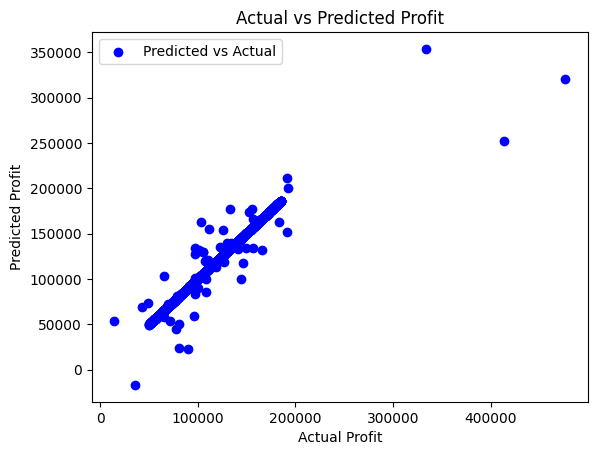

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

df_companies = pd.read_csv('company.csv')
print(df.head())

label_encoder = LabelEncoder()
df_companies['State'] = label_encoder.fit_transform(df_companies['State'])

X_companies = df_companies[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
y_companies = df_companies['Profit']

df_companies.fillna(df_companies.median(), inplace=True)

reg_companies = LinearRegression()
reg_companies.fit(X_companies, y_companies)

input_data = np.array([[91694.48, 515841.3, 11931.24, label_encoder.transform(['Florida'])[0]]])
predicted_profit = reg_companies.predict(input_data)

print(f"Predicted profit: {predicted_profit[0]:.2f} USD")

plt.scatter(y_companies, reg_companies.predict(X_companies), color='blue', label='Predicted vs Actual')
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted Profit")
plt.legend()
plt.show()